In [254]:
import numpy as np
import scipy.stats as ss
import pandas as pd
import missingno as mn
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import plot
from feature_engine.imputation import MeanMedianImputer,CategoricalImputer,ArbitraryNumberImputer,RandomSampleImputer
from feature_engine.encoding import OrdinalEncoder,CountFrequencyEncoder,DecisionTreeEncoder,WoEEncoder
from feature_engine.outliers import OutlierTrimmer,Winsorizer
from feature_engine.transformation import LogTransformer,PowerTransformer,BoxCoxTransformer
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [255]:
data = pd.read_csv('../data/train.csv',index_col='Id')
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


### Data types

In [256]:
data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [257]:
data.select_dtypes(include=np.number).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [258]:
data.select_dtypes(include=np.object).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### Identify missing values

<Figure size 3600x2400 with 0 Axes>

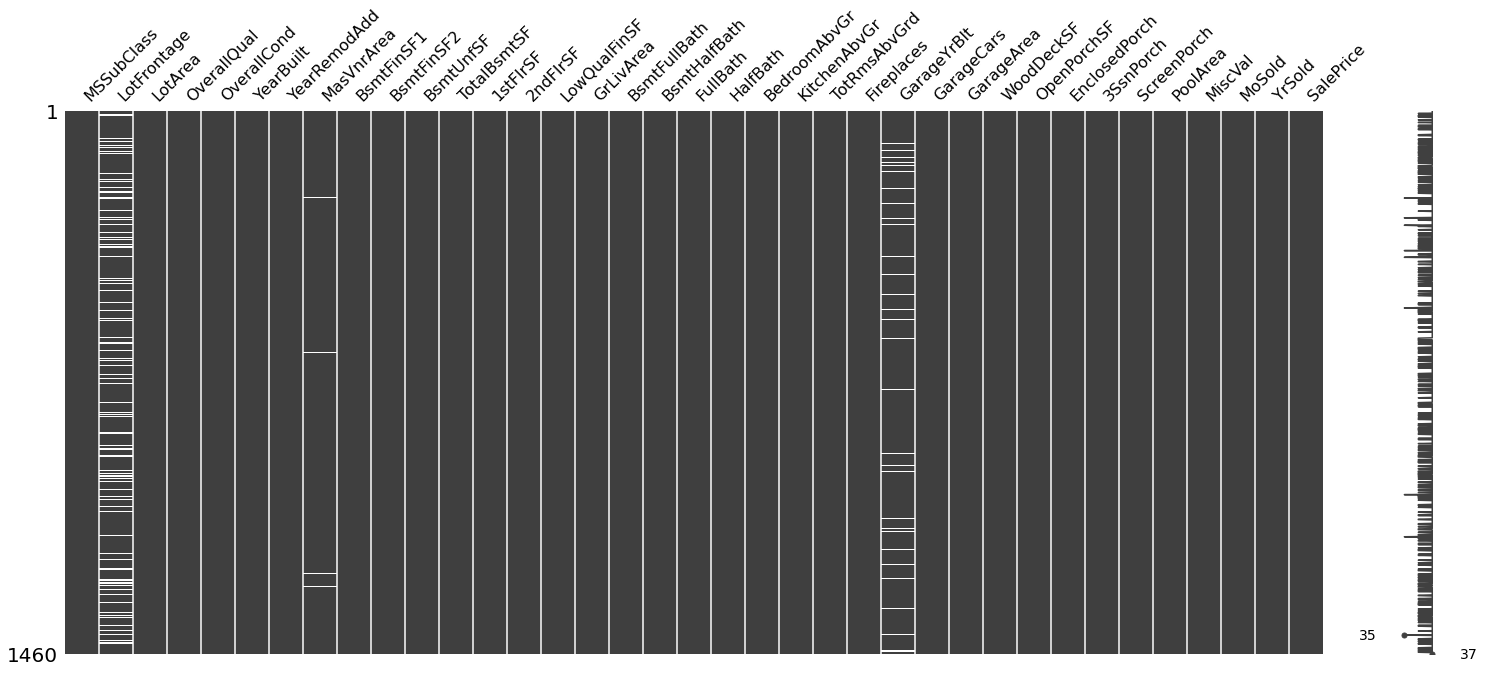

In [259]:
plt.figure(figsize=[12,8],dpi=300)
mn.matrix(data.select_dtypes(include=np.number))
plt.show()

<Figure size 3600x2400 with 0 Axes>

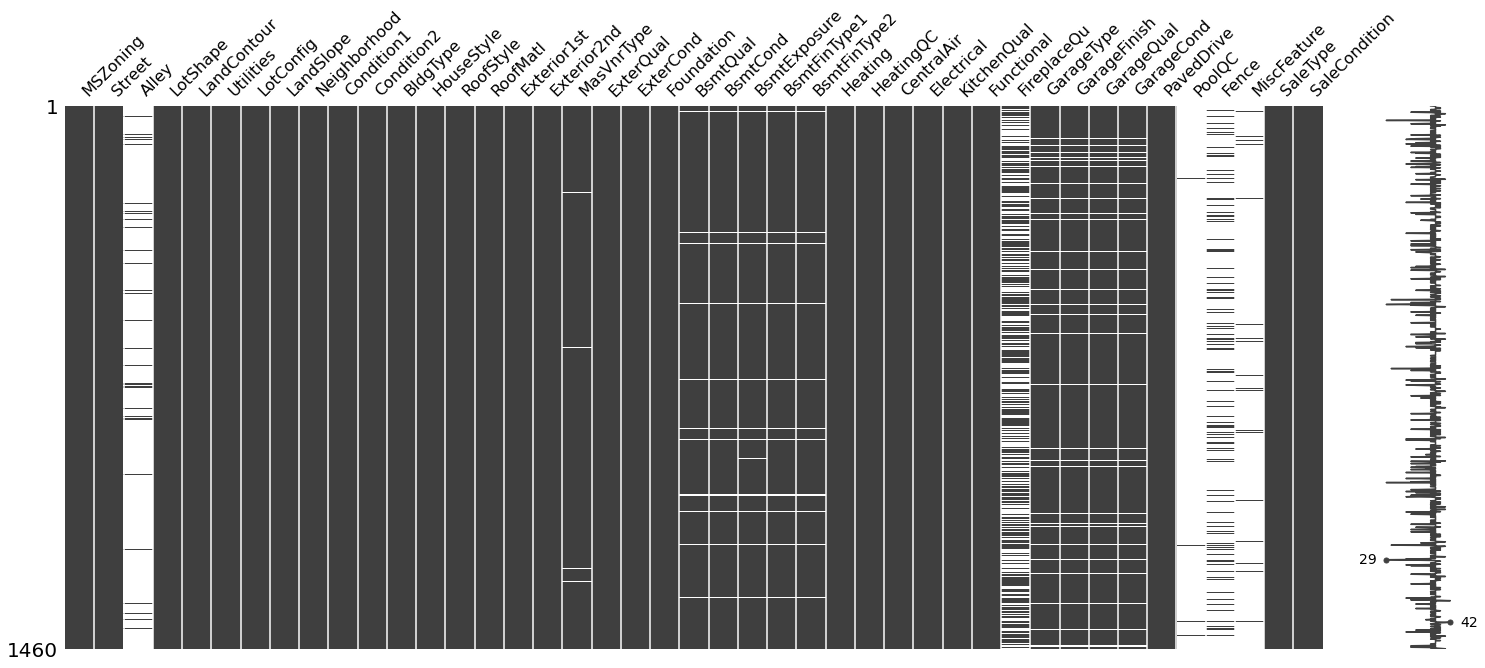

In [260]:
plt.figure(figsize=[12,8],dpi=300)
mn.matrix(data.select_dtypes(include=np.object))
plt.show()

In [261]:
mask = data.isna()

In [262]:
nas = mask.any()
(mask[nas.index[np.where(nas.values)]].mean() * 100).sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

### Handling missing values

- drop unrecoverable features (have missing values >65%)

In [263]:
data.drop(labels=['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500


### Imputation

In [264]:
data[data.isna().any().index[np.where(nas.values)]].dtypes

LotFrontage     float64
LotShape         object
MasVnrArea      float64
ExterQual        object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinSF2        int64
1stFlrSF          int64
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageCars        int64
GarageCond       object
PavedDrive       object
MoSold            int64
YrSold            int64
SaleType         object
dtype: object

In [265]:
data['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [266]:
imputer_1 = CategoricalImputer(variables=list(data.select_dtypes(include=np.object).columns.values))
imputer_1.fit(data)
imputer_1.imputer_dict_

{'MSZoning': 'Missing',
 'Street': 'Missing',
 'LotShape': 'Missing',
 'LandContour': 'Missing',
 'Utilities': 'Missing',
 'LotConfig': 'Missing',
 'LandSlope': 'Missing',
 'Neighborhood': 'Missing',
 'Condition1': 'Missing',
 'Condition2': 'Missing',
 'BldgType': 'Missing',
 'HouseStyle': 'Missing',
 'RoofStyle': 'Missing',
 'RoofMatl': 'Missing',
 'Exterior1st': 'Missing',
 'Exterior2nd': 'Missing',
 'MasVnrType': 'Missing',
 'ExterQual': 'Missing',
 'ExterCond': 'Missing',
 'Foundation': 'Missing',
 'BsmtQual': 'Missing',
 'BsmtCond': 'Missing',
 'BsmtExposure': 'Missing',
 'BsmtFinType1': 'Missing',
 'BsmtFinType2': 'Missing',
 'Heating': 'Missing',
 'HeatingQC': 'Missing',
 'CentralAir': 'Missing',
 'Electrical': 'Missing',
 'KitchenQual': 'Missing',
 'Functional': 'Missing',
 'FireplaceQu': 'Missing',
 'GarageType': 'Missing',
 'GarageFinish': 'Missing',
 'GarageQual': 'Missing',
 'GarageCond': 'Missing',
 'PavedDrive': 'Missing',
 'SaleType': 'Missing',
 'SaleCondition': 'Missin

In [267]:
data = imputer_1.transform(data)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500


In [268]:
imputer_2 = MeanMedianImputer(variables=['MasVnrArea','BsmtFinSF1','BsmtFinSF2','1stFlrSF',
                                         'GarageYrBlt','GarageCars','MoSold','YrSold'])
imputer_2.fit(data,'SalePrice')
imputer_2.imputer_dict_

{'MasVnrArea': 0.0,
 'BsmtFinSF1': 383.5,
 'BsmtFinSF2': 0.0,
 '1stFlrSF': 1087.0,
 'GarageYrBlt': 1980.0,
 'GarageCars': 2.0,
 'MoSold': 6.0,
 'YrSold': 2008.0}

In [269]:
data = imputer_2.transform(data)

In [270]:
random_imputer = RandomSampleImputer(variables=['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','1stFlrSF',
                                         'GarageYrBlt','GarageCars','MoSold','YrSold'])
random_imputer.fit(data)
data_copy = random_imputer.transform(data)

In [271]:
x = data_copy.drop('LotFrontage',axis=1)
y = data_copy['LotFrontage']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=64)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1168, 75), (292, 75), (1168,), (292,))

In [272]:
imputer_LFA = LinearRegression()
imputer_LFA.fit(x_train[['LotArea','SalePrice']].select_dtypes(include=np.number),y_train)

LinearRegression()

In [273]:
na_index = data.isna().index[np.where(data['LotFrontage'].isna().values)]
x_ = data[['LotArea','SalePrice']].loc[na_index]
predict_ = imputer_LFA.predict(x_)

In [274]:
data.loc[na_index,'LotFrontage'] = predict_
data['LotFrontage'].isna().sum()

0

<Figure size 3600x2400 with 0 Axes>

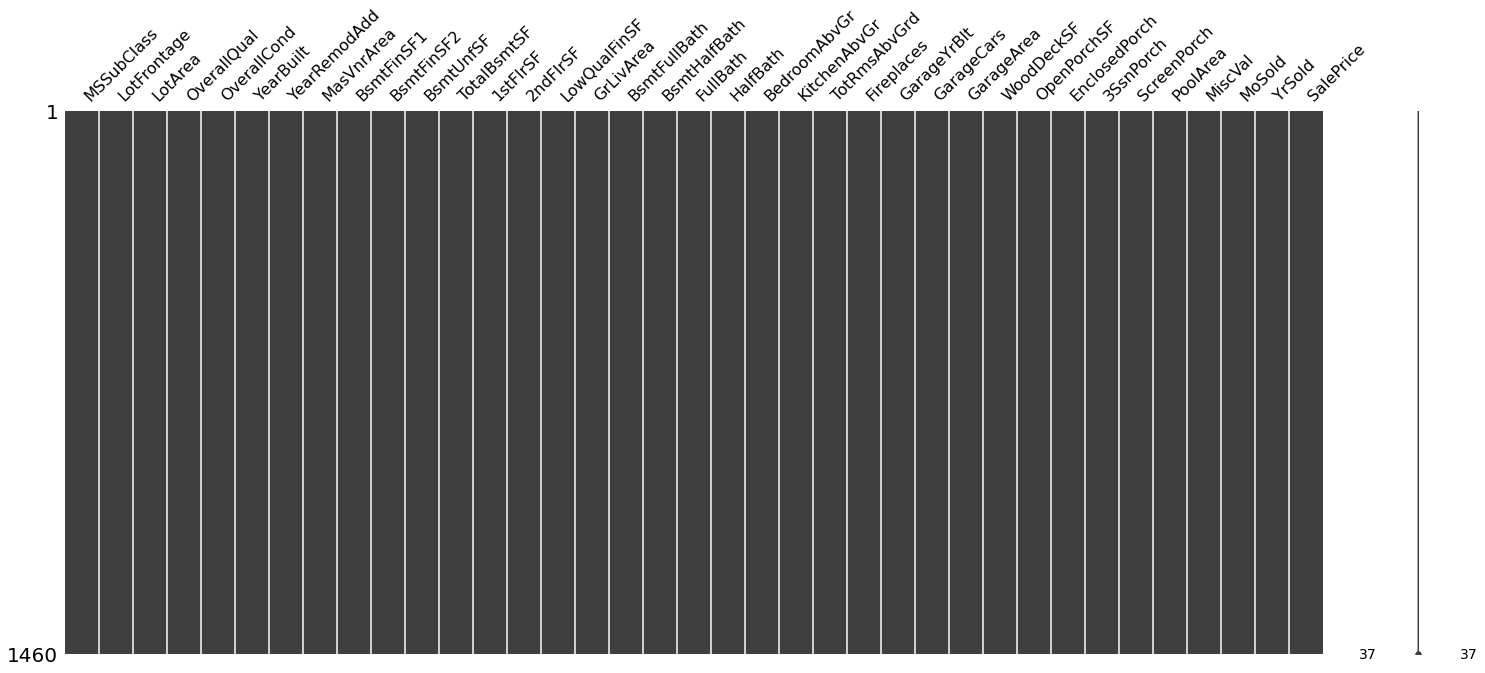

In [275]:
plt.figure(figsize=[12,8],dpi=300)
mn.matrix(data.select_dtypes(include=np.number))
plt.show()

<Figure size 3600x2400 with 0 Axes>

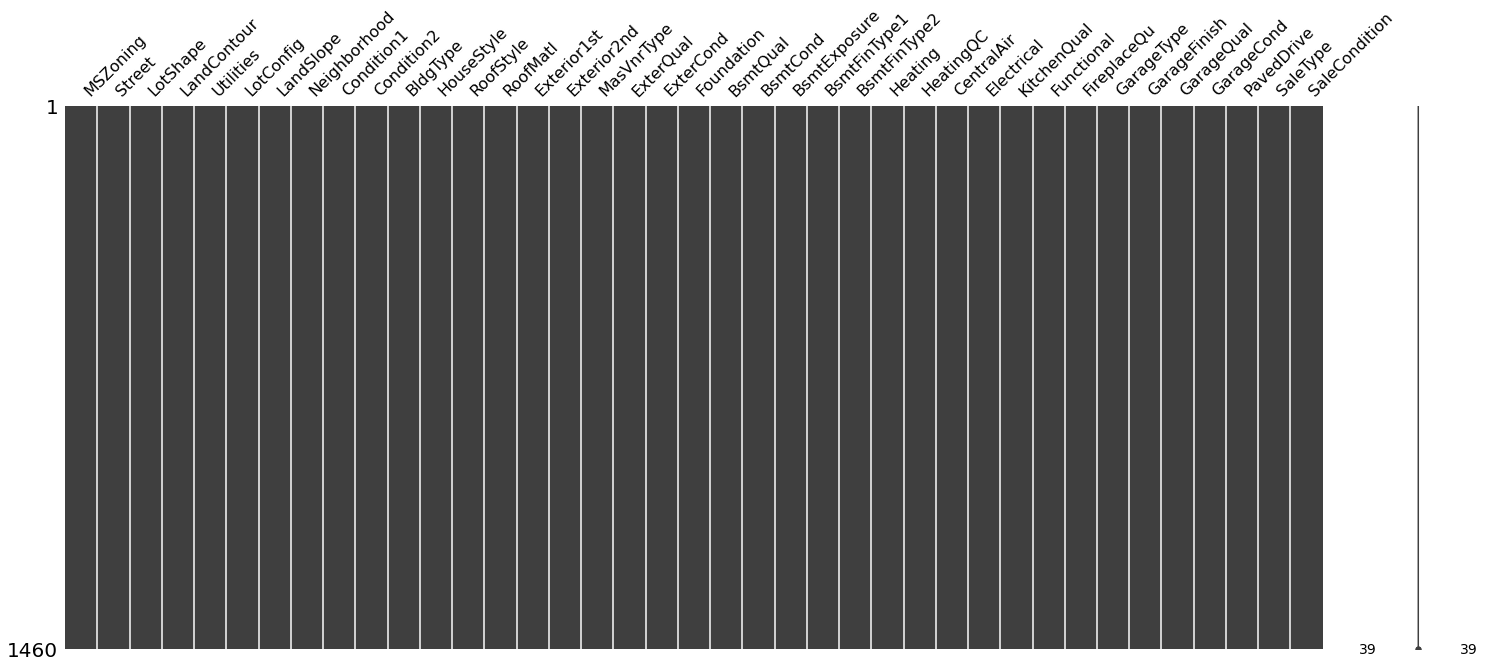

In [276]:
plt.figure(figsize=[12,8],dpi=300)
mn.matrix(data.select_dtypes(include=np.object))
plt.show()

## Discrete statistics

In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [278]:
qualitative = data.select_dtypes(include=np.object)
qualitative.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [279]:
quantitative = data.select_dtypes(include=np.number)
quantitative.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [280]:
qualitative = pd.concat([qualitative,quantitative[['OverallQual', 'OverallCond','MSSubClass']]],axis=1)
quantitative.drop(['OverallQual', 'OverallCond','MSSubClass'],axis=1,inplace=True)

c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



- scales

In [281]:
ordinal = qualitative[['LotShape','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond',
                'BsmtExposure','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']]
ordinal.shape

(1460, 13)

In [282]:
nominal = qualitative.drop(ordinal.columns,axis=1)
nominal.shape

(1460, 29)

In [284]:
interval = quantitative[['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']]
ratio = quantitative.drop(interval.columns,axis=1)

interval.shape, ratio.shape

((1460, 5), (1460, 29))

## encoding qualitative data

In [300]:
feat = qualitative.columns
figure,axes = plt.subplots(nrows=21,ncols=2,figsize=[24,156],dpi=300)
axes = axes.ravel()

for i in range(len(axes)):
    g = sns.countplot(x=qualitative[feat[i]],ax=axes[i],palette='cividis')
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    axes[i].axhline(y=qualitative.shape[0]*0.01,color='#022601')
    axes[i].axhline(y=qualitative.shape[0]*0.05,color='#AFBF73')

plt.savefig('cardinality.jpg')
plt.show()